### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
data['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [7]:
data['destination'].value_counts()

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

In [8]:
data = data.rename(columns={'passanger':'passenger'})

3. Decide what to do about your missing data -- drop, replace, other...

### Dropping the car column as it has many missing data

In [9]:
data = data.drop('car', axis=1)

### Dropping the rows that are blank in the Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 columns

In [128]:
#The below is not needed and the results are without the below step of dropping the empty rows and 
#they are dropped where needed.
#data = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50'], axis=0)

In [127]:
#data.isnull().sum()

### $ sign needs an escape sequence. So removing it by using replace function.

In [10]:
data['income'] = data['income'].str.replace('$', '', regex = True)

In [11]:
data['income'].value_counts()

25000 - 37499      2013
12500 - 24999      1831
37500 - 49999      1805
100000 or More     1736
50000 - 62499      1659
Less than 12500    1042
87500 - 99999       895
75000 - 87499       857
62500 - 74999       846
Name: income, dtype: int64

### Renaming the string in the columns bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 to more readable format

In [12]:
NewColNames = {'never':'X=0','less1' : 'X<1', '1~3': '1<X<3', '4~8': '4<X<8', 'gt8':'X>8'}
for old, new in NewColNames.items():
    data['Bar'] = data['Bar'].str.replace(old, new, regex=True)
    data['CoffeeHouse'] = data['CoffeeHouse'].str.replace(old, new, regex=True)
    data['CarryAway'] = data['CarryAway'].str.replace(old, new, regex=True)
    data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace(old, new, regex=True)
    data['Restaurant20To50'] = data['Restaurant20To50'].str.replace(old, new, regex=True)


In [13]:
data['CoffeeHouse'].value_counts()

X<1      3385
1<X<3    3225
X=0      2962
4<X<8    1784
X>8      1111
Name: CoffeeHouse, dtype: int64

4. What proportion of the total observations chose to accept the coupon?


In [14]:
data['Y'].value_counts(normalize=True)

1    0.568433
0    0.431567
Name: Y, dtype: float64

In [203]:
sns.countplot(x=data['Y'], data=data)

NameError: name 'mean' is not defined

### About 57% of the participants chose to accept a coupon.

5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'No of Coupons')

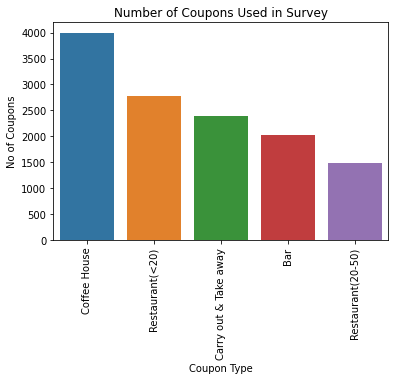

In [150]:
sns.barplot(y=data['coupon'].value_counts(), x= data['coupon'].value_counts().index)
from numpy import count_nonzero
#ax = sns.barplot(data=data, x='coupon', y='Y', estimator = count_nonzero)
plt.xticks(rotation=90)
plt.title('Number of Coupons Used in Survey')
plt.xlabel('Coupon Type')
plt.ylabel('No of Coupons')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of Temperatures')

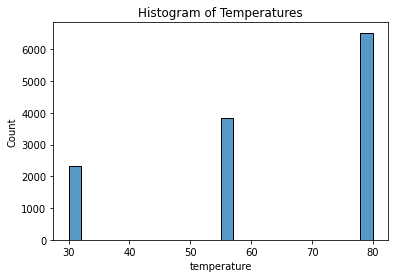

In [18]:
sns.histplot(data = data, x = 'temperature')
plt.title('Histogram of Temperatures')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
dfBar = data.query('coupon == "Bar"')
dfBar.shape

(2017, 25)

In [156]:
df1 = dfBar.groupby(by = ['education'], as_index=False)[['Y']].value_counts(normalize=True).pivot(index='Y', values = 'proportion', columns='education')
df1

education,Associates degree,Bachelors degree,Graduate degree (Masters or Doctorate),High School Graduate,Some High School,Some college - no degree
Y,,,,,,
0,0.691892,0.590164,0.629213,0.605442,0.214286,0.553009
1,0.308108,0.409836,0.370787,0.394558,0.785714,0.446991


<AxesSubplot:xlabel='education', ylabel='Y'>

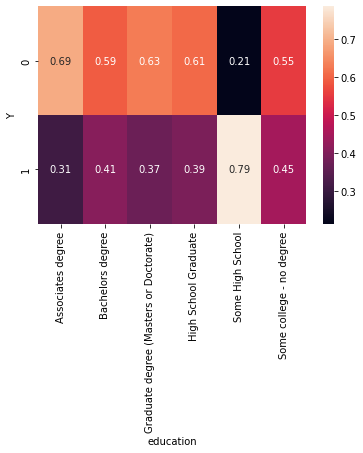

In [158]:
sns.heatmap(df1, annot=True)

<AxesSubplot:xlabel='education', ylabel='Y'>

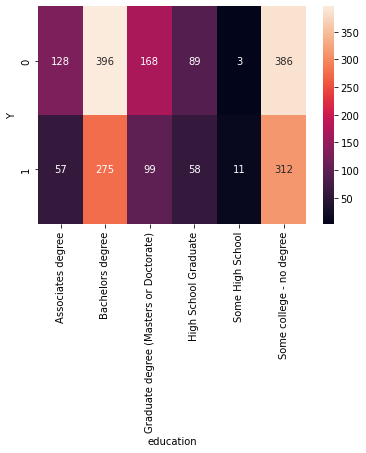

In [154]:
df = dfBar.groupby(by = ['education'], as_index=False)[['Y']].value_counts()
df1 = pd.pivot_table(df, index=['Y'], columns=['education'], values = 'count')
sns.heatmap(df1, annot=True, fmt='d')

2. What proportion of bar coupons were accepted?


In [21]:
dfBar['Y'].value_counts(normalize=True)

0    0.589985
1    0.410015
Name: Y, dtype: float64

### Only 41% of the Bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [36]:
dfBar.dropna(subset='Bar').groupby(dfBar['Bar'].isin(['X=0', 'X<1', '1<X<3']))[['Y']].value_counts()

Bar    Y
False  1     153
       0      46
True   0    1131
       1     666
dtype: int64

Text(0.5, 1.0, 'Acceptance Rate by No of Bar visits')

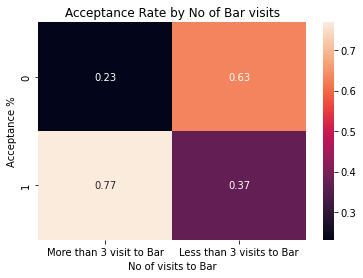

In [166]:
sns.heatmap(dfBar.dropna(subset='Bar').groupby(dfBar['Bar'].isin(['X=0', 'X<1', '1<X<3']))[['Y']].value_counts(normalize=True)\
            .reset_index().pivot(index='Y', columns='Bar', values=0)\
            .rename(columns={True: 'Less than 3 visits to Bar', False:'More than 3 visit to Bar'}), annot=True)
plt.ylabel('Acceptance %')
plt.xlabel('No of visits to Bar')
plt.title('Acceptance Rate by No of Bar visits')

### From the above, only 37% of the people who went to a bar fewer than 3 times accepted the coupons compared to an acceptance rate of 77% of the people who went to a bar more than 3 times.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [40]:
dfBar.dropna(subset='Bar').groupby(dfBar['Bar'].isin(['1<X<3','4<X<8','X>8']) & 
             dfBar['age'].isin(['26', '31', '36','41', '46', '50plus']))[['Y']].value_counts()

       Y
False  0    1049
       1     527
True   1     292
       0     128
dtype: int64

Text(33.0, 0.5, 'Acceptance %')

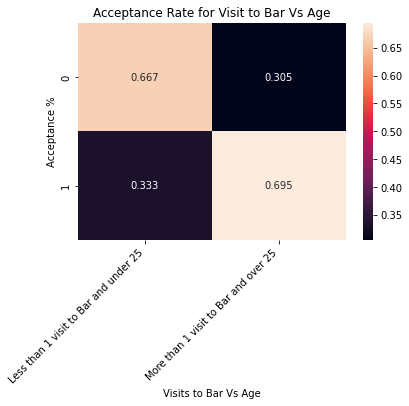

In [184]:
sns.heatmap(dfBar.dropna(subset='Bar').groupby(dfBar['Bar'].isin(['1<X<3','4<X<8','X>8']) & 
             dfBar['age'].isin(['26', '31', '36','41', '46', '50plus']))[['Y']].value_counts(normalize=True)\
            .reset_index().pivot(index='Y', columns='level_0', values=0)\
            .rename(columns={False:'Less than 1 visit to Bar and under 25', True:'More than 1 visit to Bar and over 25'}),
            annot=True, fmt='.3g')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Visits to Bar Vs Age')
plt.title('Acceptance Rate for Visit to Bar Vs Age')
plt.ylabel('Acceptance %')

### Drivers who go to the bar more than once a month and over the age of 25 accepted 69.5% of the times compared to drivers who went to a bar less than once and under the age of 25 accepting only 33% of the times.

5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

### Null Hypothesis: The acceptance rate = 69.5% for people who go to the bar more than once and over the age of 25.
### Alternate Hypothesis: The acceptance <> 69.5% for people who go to bar more than once and over the age of 25.

6. Using alpha at 0.05 test your hypothesis and state your conclusion.

In [47]:
# confirming we have the right data to pass to the hypothesis testing
dfGroupOver25MoreThanOnceToBar = dfBar.dropna(subset='Bar').loc[dfBar['Bar'].isin(['1<X<3','4<X<8','X>8']) & 
             dfBar['age'].isin(['26', '31', '36','41', '46', '50plus'])]
dfGroupOver25MoreThanOnceToBar['Y'].value_counts()

1    292
0    128
Name: Y, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

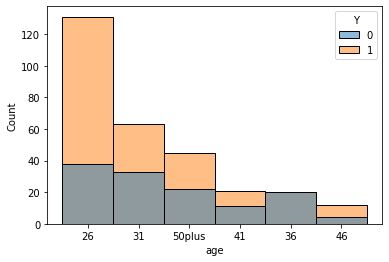

In [46]:
sns.histplot(dfGroupOver25MoreThanOnceToBar, x='age', hue='Y')

In [48]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(dfGroupOver25MoreThanOnceToBar['Y'], x2=None, value=0.695)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.9915522209175297
accept null hypothesis


### The null hypothesis has acceptance tolerance between 66% to 73%

7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [50]:
ReqProfessions = list(dfBar['occupation'].unique())
ReqProfessions.remove('Farming Fishing & Forestry')
#ReqProfessions

In [51]:
dfGroupMoreThanOnceExclFarming = dfBar.dropna(subset='Bar').loc[((dfBar['Bar'].str.contains('|'.join(['1<X<3','4<X<8','X>8']))) & (dfBar['passenger'] != 'Kid(s)') & (dfBar['occupation'].str.contains('|'.join(ReqProfessions))))]
dfGroupMoreThanOnceExclFarming['Y'].value_counts(normalize=True)

1    0.713249
0    0.286751
Name: Y, dtype: float64

### Null Hypothesis: The acceptance rate = 71.3% for people who go to the bar more than once and with no child as passenger and not in the farming profession.
### Alternate Hypothesis: The acceptance <> 71.3% for people who go to bar more than once and with no child as passenger and not in the farming profession.

In [52]:
ztest ,pval = stests.ztest(dfGroupMoreThanOnceExclFarming['Y'], x2=None, value=0.713)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.9897126119655012
accept null hypothesis


### The null hypothesis has acceptance tolerance between 68% and 75% for 95% confidence

8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



#### Acceptance rate for people who go to bars more than once a month and no kid as passenger and not widowed is 71%

In [54]:
LisNotWidowed = ['Married partner', 'Single', 'Unmarried partner']
dfGroupMoreThanOnceToBarNotWidowed = dfBar.dropna(subset='Bar').loc[dfBar['Bar'].isin(['1<X<3','4<X<8','X>8']) &
                        (dfBar['passenger'] != 'Kid(s)') & dfBar['maritalStatus'].isin(LisNotWidowed)]
dfGroupMoreThanOnceToBarNotWidowed['Y'].value_counts(normalize=True)

1    0.710037
0    0.289963
Name: Y, dtype: float64

#### Acceptance rate for people who go to bars more than once a month and under the age of 30 is 72%

In [55]:
dfGroupMoreThanOnceToBarUnder30 = dfBar.dropna(subset='Bar').loc[dfBar['Bar'].isin(['1<X<3','4<X<8','X>8']) &
                                dfBar['age'].isin(['below21','21','26', ])]
dfGroupMoreThanOnceToBarUnder30['Y'].value_counts(normalize=True)

1    0.721739
0    0.278261
Name: Y, dtype: float64

#### Acceptance rate for people who go to cheap restaurants more than 4 times in a month and with income less than 50k is 46%

In [56]:
dfBar = dfBar.dropna(subset='Bar')
dfBar = dfBar.dropna(subset='RestaurantLessThan20')
dfBar.shape
#dfBar.isnull().sum()

(1982, 25)

In [57]:
ListIncomeLessThan50K = ['Less than 12500','12500 - 24999','25000 - 37499', '37500 - 49999']
dfToCheapRestMoreThan4IncomeLessThan50K = dfBar.loc[dfBar['RestaurantLessThan20'].isin(['4<X<8','X>8']) & 
                                dfBar['income'].isin(ListIncomeLessThan50K)]
dfToCheapRestMoreThan4IncomeLessThan50K['Y'].value_counts(normalize=True)

0    0.542773
1    0.457227
Name: Y, dtype: float64

9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

### It can be concluded that the bar coupon  acceptance rate is much higher among those who already go to bars more than once a month

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Investigating the popularity of the coupons

In [59]:
dfGroupByCoupon = data.groupby('coupon')[['Y']].value_counts().reset_index()\
                .rename(columns = {0:'Count'}).pivot(columns='coupon', index='Y',values= 'Count')
dfGroupByCoupon

coupon,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20)
Y,,,,,
0,1190,633,2001,834,816
1,827,1760,1995,658,1970


In [60]:
dfGroupByCoupon = pd.DataFrame(data.groupby('coupon')[['Y']].value_counts(normalize=True), columns = ['Percent'])\
                    .reset_index().pivot(index='Y', columns='coupon', values='Percent')
dfGroupByCoupon

coupon,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20)
Y,,,,,
0,0.589985,0.264522,0.500751,0.558981,0.292893
1,0.410015,0.735478,0.499249,0.441019,0.707107


Text(0.5, 1.0, 'Pupularity of the coupon based on Acceptance Rate')

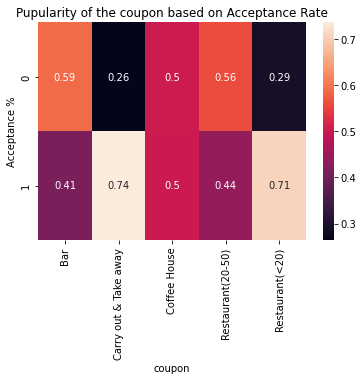

In [97]:
sns.heatmap(dfGroupByCoupon, annot=True, fmt='.2g')
plt.ylabel('Acceptance %')
plt.title('Pupularity of the coupon based on Acceptance Rate')

### The 'Carry out & Take away' coupon was the most popular with 74% acceptance rate followed by 'Restaurant(<20)' coupon with 71% and the 'Bar' coupon was the least popular with only 41% acceptance rate.

## Investigating the 'Carry out & Take away' coupon

In [73]:
#dfTakeaway = data.query('coupon == "Carry out & Take away"').dropna(subset=['CarryAway'])
dfTakeaway = data.query('coupon == "Carry out & Take away"')
dfTakeaway.shape

(2393, 25)

### There was high acceptance rate, of over 70%, for the 'Carry out & Take away' coupon irrespective of the direction of the resturant

In [84]:
dfTakeaway.groupby(by=['direction_same', 'direction_opp'])['Y'].value_counts(normalize=True)

direction_same  direction_opp  Y
0               1              1    0.751250
                               0    0.248750
1               0              1    0.703657
                               0    0.296343
Name: Y, dtype: float64

### The acceptance rate for people headed home is the highest compared to any other destination

In [92]:
dfTakeAwayByDest = pd.DataFrame(dfTakeaway.groupby('destination')[['Y']].value_counts(normalize=True)).rename(columns={0:'Acceptance %'})\
            .reset_index().pivot(index='Y', columns='destination', values = 'Acceptance %')
dfTakeAwayByDest

destination,Home,No Urgent Place,Work
Y,,,
0,0.211332,0.237219,0.345144
1,0.788668,0.762781,0.654856


Text(0.5, 1.0, 'Acceptance Rate based on Destination')

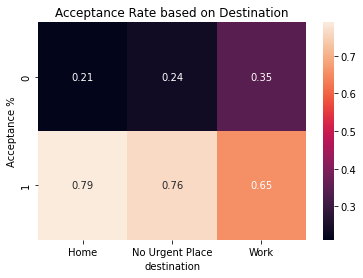

In [96]:
sns.heatmap(dfTakeAwayByDest, annot=True)
plt.ylabel('Acceptance %')
plt.title('Acceptance Rate based on Destination')

### 2PM seems to be the most popular time for the 'Carry out & Take away' coupon

<AxesSubplot:xlabel='time', ylabel='Count'>

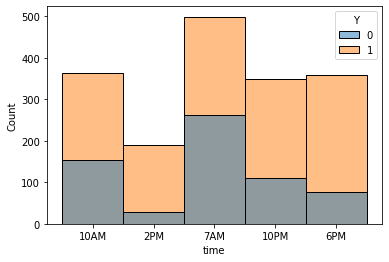

In [120]:
sns.histplot(dfTakeaway, x='time', hue='Y')

The above histplot does not tell a story about the acceptance rate on the time of the day

<AxesSubplot:xlabel='time', ylabel='0'>

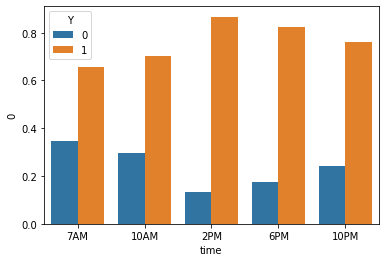

In [121]:
InterestedLabel = 'time'
sns.barplot(data = dfTakeaway.groupby(InterestedLabel)[['Y']].value_counts(normalize=True)\
            .reset_index(), x=InterestedLabel, y=0, hue='Y', order = ['7AM', '10AM', '2PM', '6PM','10PM'])

<AxesSubplot:xlabel='age', ylabel='0'>

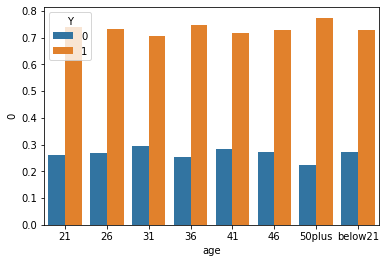

In [116]:
InterestedLabel = 'age'
sns.barplot(data = dfTakeaway.groupby(InterestedLabel)[['Y']].value_counts(normalize=True)\
            .reset_index(), x=InterestedLabel, y=0, hue='Y')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '100000 or More'),
  Text(1, 0, '12500 - 24999'),
  Text(2, 0, '25000 - 37499'),
  Text(3, 0, '37500 - 49999'),
  Text(4, 0, '50000 - 62499'),
  Text(5, 0, '62500 - 74999'),
  Text(6, 0, '75000 - 87499'),
  Text(7, 0, '87500 - 99999'),
  Text(8, 0, 'Less than 12500')])

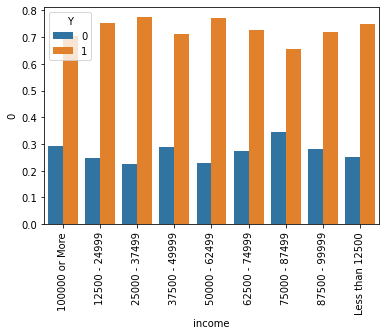

In [114]:
InterestedLabel = 'income'
sns.barplot(data = dfTakeaway.groupby(InterestedLabel)[['Y']].value_counts(normalize=True).reset_index(), x=InterestedLabel, y=0, hue='Y')
plt.xticks(rotation=90)

### The 'Carry out & Take away' coupon seems to be the most popular among High school attendees and least popluar with those who had a Masters or Doctorate degree

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Associates degree'),
  Text(1, 0, 'Bachelors degree'),
  Text(2, 0, 'Graduate degree (Masters or Doctorate)'),
  Text(3, 0, 'High School Graduate'),
  Text(4, 0, 'Some High School'),
  Text(5, 0, 'Some college - no degree')])

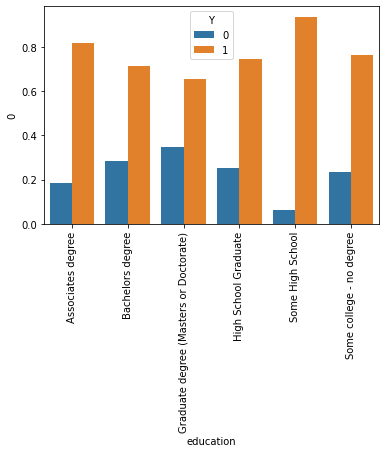

In [113]:
InterestedLabel = 'education'
sns.barplot(data = dfTakeaway.groupby(InterestedLabel)[['Y']].value_counts(normalize=True).reset_index(), x=InterestedLabel, y=0, hue='Y')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='gender', ylabel='0'>

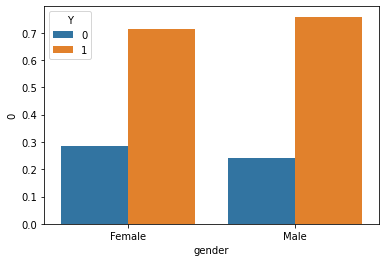

In [124]:
InterestedLabel = 'gender'
sns.barplot(data = dfTakeaway.groupby(InterestedLabel)[['Y']].value_counts(normalize=True).reset_index(), x=InterestedLabel, y=0, hue='Y')

<AxesSubplot:xlabel='has_children', ylabel='0'>

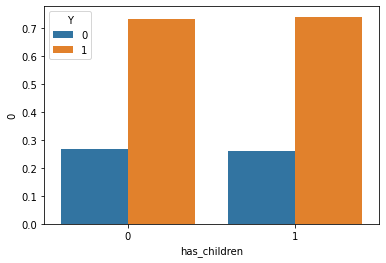

In [125]:
InterestedLabel = 'has_children'
sns.barplot(data = dfTakeaway.groupby(InterestedLabel)[['Y']].value_counts(normalize=True).reset_index(), x=InterestedLabel, y=0, hue='Y')

### The acceptance level for the takeaway coupon is usually higher on a sunny day compared to a snowy day and significantly higher than a rainy day.

<AxesSubplot:xlabel='weather', ylabel='0'>

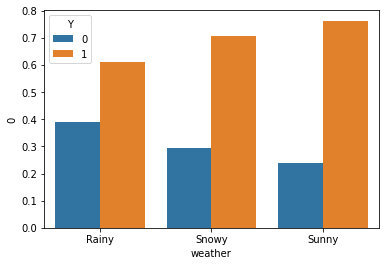

In [126]:
InterestedLabel = 'weather'
sns.barplot(data = dfTakeaway.groupby(InterestedLabel)[['Y']].value_counts(normalize=True)\
            .reset_index(), x=InterestedLabel, y=0, hue='Y')

### The coupon seems to be equally popular among people who are used to 'CarryAway' food or not.

<AxesSubplot:xlabel='CarryAway', ylabel='0'>

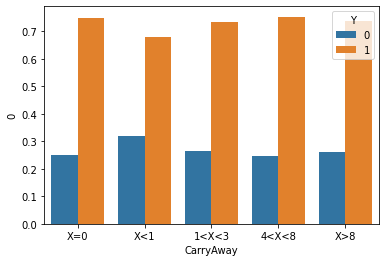

In [132]:
InterestedLabel = 'CarryAway'
sns.barplot(data = dfTakeaway.groupby(InterestedLabel)[['Y']].value_counts(normalize=True)\
            .reset_index(), x=InterestedLabel, y=0, hue='Y', order = ['X=0', 'X<1', '1<X<3', '4<X<8', 'X>8'])

### The takeaway coupon seems to the most popular among Cleaning & Maintenance, Construction & Extraction and Protective service occupations with least popularity among lawyers and Life Physical and Social Sciences occupations.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Architecture & Engineering'),
  Text(1, 0, 'Arts Design Entertainment Sports & Media'),
  Text(2, 0, 'Building & Grounds Cleaning & Maintenance'),
  Text(3, 0, 'Business & Financial'),
  Text(4, 0, 'Community & Social Services'),
  Text(5, 0, 'Computer & Mathematical'),
  Text(6, 0, 'Construction & Extraction'),
  Text(7, 0, 'Education&Training&Library'),
  Text(8, 0, 'Farming Fishing & Forestry'),
  Text(9, 0, 'Food Preparation & Serving Related'),
  Text(10, 0, 'Healthcare Practitioners & Technical'),
  Text(11, 0, 'Healthcare Support'),
  Text(12, 0, 'Installation Maintenance & Repair'),
  Text(13, 0, 'Legal'),
  Text(14, 0, 'Life Physical Social Science'),
  Text(15, 0, 'Management'),
  Text(16, 0, 'Office & Administrative Support'),
  Text(17, 0, 'Personal Care & Service'),
  Text(18, 0, 'Production Occupations'),
  Text(19, 0, 'Protective Service'),


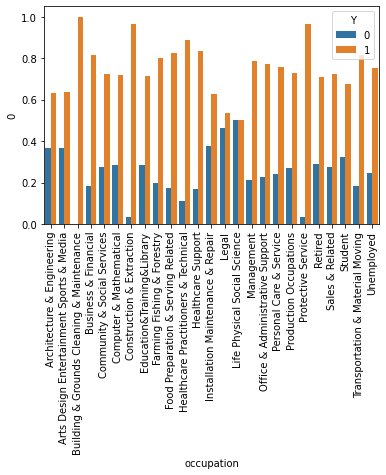

In [133]:
InterestedLabel = 'occupation'
sns.barplot(data = dfTakeaway.groupby(InterestedLabel)[['Y']].value_counts(normalize=True).reset_index(), x=InterestedLabel, y=0, hue='Y')
plt.xticks(rotation=90)